In [1]:
!pip install xgboost==1.6.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor



import matplotlib.pyplot as plt 
import seaborn  as sns

In [3]:
import inspect


In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
data=pd.read_csv('/work/QML-Research_Dataset - Dataset.csv')
data.drop('Index',
  axis='columns',inplace=True)

In [6]:
data

,Area,OE,COb,Area_left,considerble trees,considerable plants,Neem,Ash,Willow,Poplar,Ashok,Arjuna,Areca_palm,Weeping_fig,Grebera_Daisy,Aloe_vera,Tulsi,Pothos_plant
0,3760,63038,4389,470,52,26,3,1,1,1,0,1,6,4,4,3,7,5
1,4310,72482,5019,539,60,30,3,1,1,1,0,1,6,4,4,3,7,6
2,5773,96918,6741,722,80,40,3,1,1,1,0,1,6,5,3,4,8,7
3,4384,73692,5103,548,61,30,3,1,1,2,2,1,7,7,8,5,13,6
4,7249,121723,8463,906,101,50,4,2,2,3,2,2,9,5,3,4,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5146,86515,6006,643,72,36,2,0,0,1,0,0,2,0,7,7,5,6
496,7517,126327,8757,940,104,52,4,1,1,4,1,1,9,8,9,7,15,8
497,7269,122210,8484,909,101,50,4,1,2,3,1,1,4,9,7,8,5,5
498,4637,77927,5397,580,64,32,3,1,1,2,1,0,5,6,5,5,6,8


In [27]:
_deepnote_run_altair(data, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Area","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Area_left","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [7]:
          
# data = pd.DataFrame(data)
X=data.iloc[:,0:4].values
Y=data[['considerble trees','considerable plants']]
print("X:",X.shape)
print("Y:",Y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.33, random_state=42)


X: (500, 4)
Y: (500, 2)


In [8]:
scaler=StandardScaler()
X_train_sacled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


Y_scaled_train=scaler.fit_transform(y_train)
Y_scaled_test=scaler.fit_transform(y_test)


In [9]:
def show_(X_test_scaled,y_test_predict,y_mse,y_r2_):
    plt.figure(figsize=(8,6))
    

    plt.scatter(y_test_predict[name],Y_scaled_test)
    plt.title(name)
    plt.xlabel("Actual")
    plt.ylabel("predicted")
    plt.show()
    print('RMSE for ',name,' is         :',y_mse[name])
    print('r2_score for ',name,' is     :',y_r2_[name])
    print("score",name, 'is             :',score[name])

In [10]:

ESTIMATORS = {
    "K-nn": KNeighborsRegressor(leaf_size=60,p=1,n_neighbors=29,n_jobs=1,weights='uniform',algorithm='brute'), 
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5)),

}

In [11]:

model=LinearRegression()
model.fit(X_train_sacled,y_train)


# importance=pd.DataFrame(data={
#     "Attribute":X_train.columns,
#     "Importance":model.coef_[0]
# })
# importance=importance.sort_values(by="Importance",ascending=False)

LinearRegression()

In [12]:
# importance=pd.DataFrame(data={
#     "Attribute":x_train.columns,
#     "Importance":model.coef_[0]
# })
# importance=importance.sort_values(by="Importance",ascending=False)

In [13]:
y_test_predict = dict()
y_mse = dict()
y_r2_=dict()
score=dict()

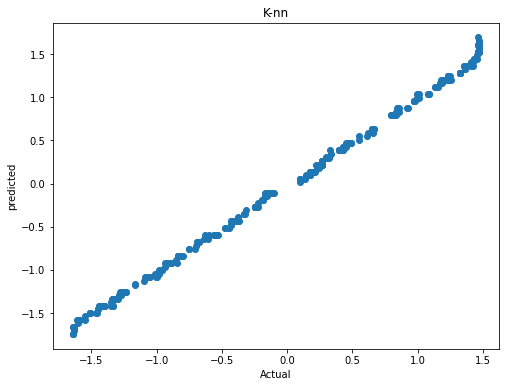

RMSE for  K-nn  is         : 0.0020769558198155957
r2_score for  K-nn  is     : 0.9979230441801844
score K-nn is             : 0.9979230441801844


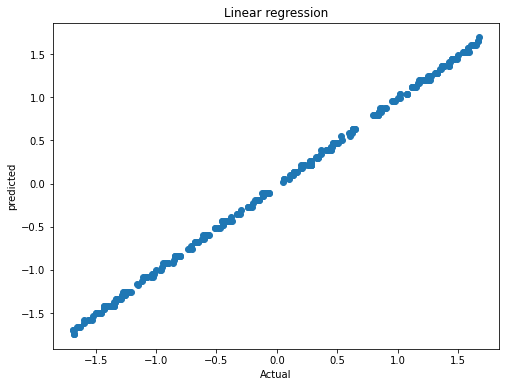

RMSE for  Linear regression  is         : 0.0008679388975576905
r2_score for  Linear regression  is     : 0.9991320611024423
score Linear regression is             : 0.9991320611024423


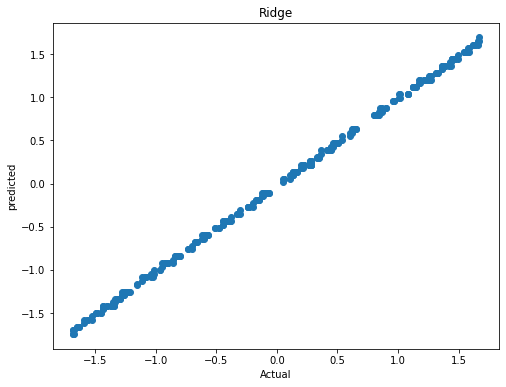

RMSE for  Ridge  is         : 0.0008833729422259848
r2_score for  Ridge  is     : 0.999116627057774
score Ridge is             : 0.999116627057774


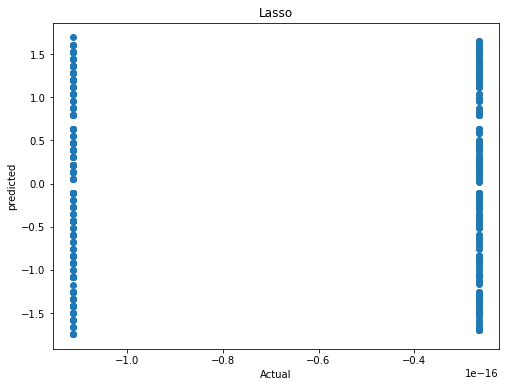

RMSE for  Lasso  is         : 1.0
r2_score for  Lasso  is     : -3.3306690738754696e-16
score Lasso is             : -3.3306690738754696e-16


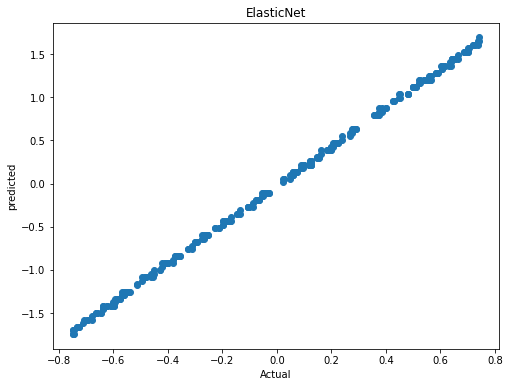

RMSE for  ElasticNet  is         : 0.3091724598384487
r2_score for  ElasticNet  is     : 0.6908275401615511
score ElasticNet is             : 0.6908275401615511


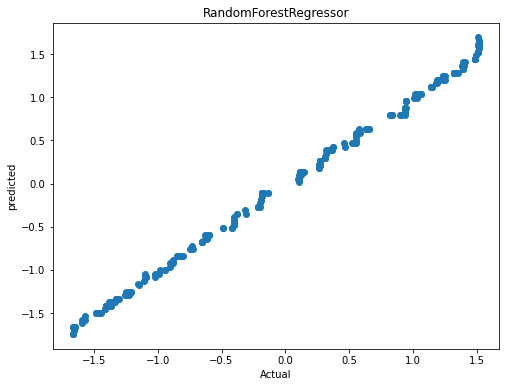

RMSE for  RandomForestRegressor  is         : 0.001977175791169506
r2_score for  RandomForestRegressor  is     : 0.9980228242088305
score RandomForestRegressor is             : 0.9980228242088305


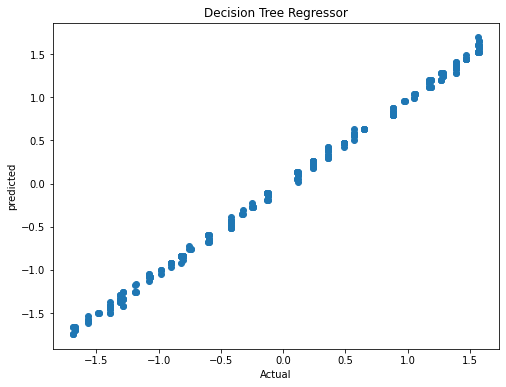

RMSE for  Decision Tree Regressor  is         : 0.0017853931960591716
r2_score for  Decision Tree Regressor  is     : 0.9982146068039408
score Decision Tree Regressor is             : 0.9982146068039408


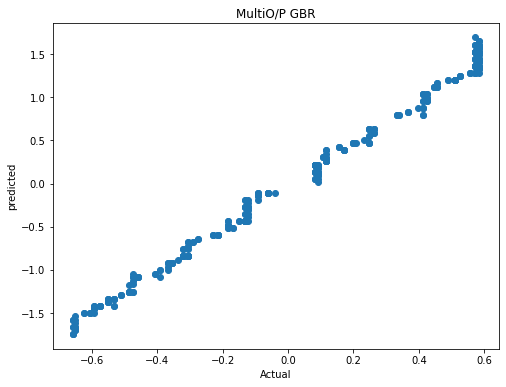

RMSE for  MultiO/P GBR  is         : 0.35937609440876966
r2_score for  MultiO/P GBR  is     : 0.6406239055912302
score MultiO/P GBR is             : 0.6406239055912302


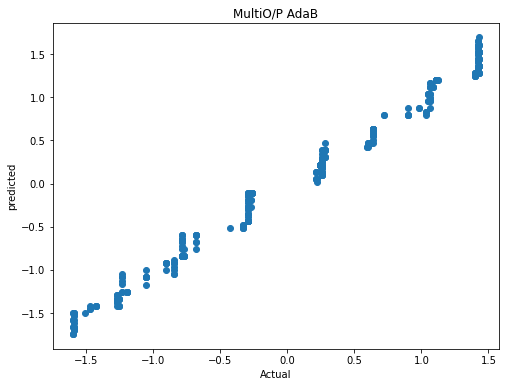

RMSE for  MultiO/P AdaB  is         : 0.011277586359266198
r2_score for  MultiO/P AdaB  is     : 0.9887224136407338
score MultiO/P AdaB is             : 0.9887224136407338


In [14]:
for name,estimator in ESTIMATORS.items():
    estimator.fit(X_train_sacled,Y_scaled_train)
    y_test_predict[name]= estimator.predict(X_test_scaled)    
    y_mse[name]=mean_squared_error(Y_scaled_test,estimator.predict(X_test_scaled))
    y_r2_[name]=r2_score(Y_scaled_test,estimator.predict(X_test_scaled))
    score[name]=estimator.score(X_test_scaled,Y_scaled_test)
    show_(X_test_scaled,y_test_predict,y_mse,y_r2_)


# HYPER PARAMETER TUNIG

In [15]:
clf123=KNeighborsRegressor()
clf123.fit(X_train_sacled,Y_scaled_train)

KNeighborsRegressor()

In [16]:
pred=pd.DataFrame(clf123.predict(X_test_scaled))
pred.columns = ['considerble trees', 'onsiderable plants']
pred

,considerble trees,onsiderable plants
0,1.574559,1.550050
1,-0.436591,-0.411915
2,0.331897,0.340172
3,-0.567398,-0.575412
4,0.217441,0.242073
...,...,...
160,-1.368588,-1.392898
161,0.470879,0.454620
162,-0.910765,-0.902406
163,-0.567398,-0.575412


In [19]:
_deepnote_run_altair(pred, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"line","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"considerble trees","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"onsiderable plants","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6921146-ce34-4339-96ea-8b58d86679fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>